### Regression model is used for continuous value

# Model Evaluation of Regression model
- MAE
- MSE
- RMSE
- r-squared


## Data Collection
- inbuilt Diabatese Dataset

In [4]:
#importing necessary models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loding Data Set
data = datasets.load_diabetes()
# Creating a dataframe
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Model Building and training

In [5]:
# data split
X = df.drop(columns = ['target'] , axis = 1)
y = df['target']

# Split dataset
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [6]:
# Model building
model = LinearRegression()

# Model trainning
model.fit(X_train, y_train)

LinearRegression()

## Prediction And Evaluation

In [7]:
# Prediction

y_predict = model.predict(X_test)

# Creating a dataFrame  with actual & predicted value

df_predict = pd.DataFrame({'Actual' : y_test , 'Prediction': y_predict})
df_predict.head()

,Actual,Prediction
287,219.0,139.547558
211,70.0,179.517208
72,202.0,134.038756
321,230.0,291.417029
73,111.0,123.789659


## Model Evaluation


In [8]:
mae = metrics.mean_absolute_error(y_test , y_predict)

In [9]:
print(mae)

42.79409467959994


In [10]:
mse = metrics.mean_squared_error(y_test , y_predict)
print(mse)

2900.19362849348


In [11]:
rmse = metrics.root_mean_squared_error(y_test , y_predict)

In [12]:
print(rmse)

53.853445836765914


In [14]:
r2 = metrics.r2_score(y_test , y_predict)
print(f' r2 is : {r2:.2f}')

 r2 is : 0.45


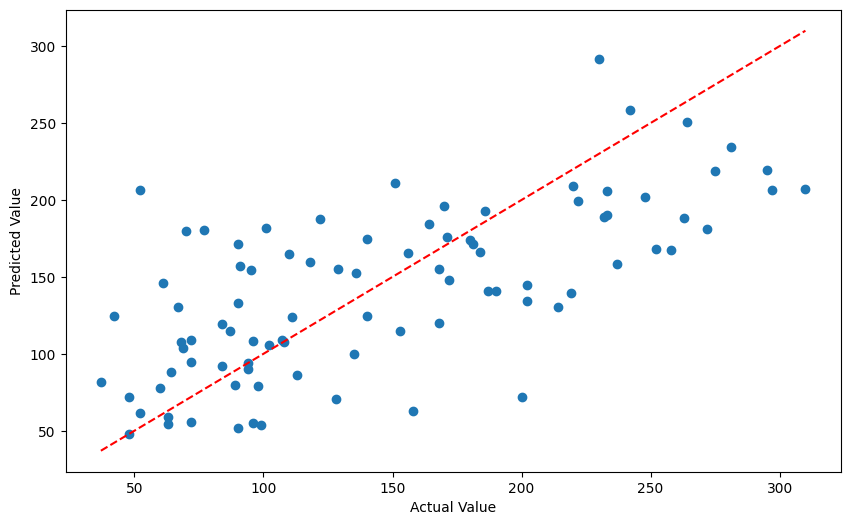

In [15]:
# Visualizing Actual & Predicted Value

plt.figure(figsize = (10,6))
plt.scatter(y_test , y_predict)
plt.plot([y_test.min(),y_predict.max()],[y_test.min(),y_predict.max()] , 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# HousePrice Prediction - Multiple Linear Regression

In [2]:
# we need to predict House Price based on multiple feature like area , no. of bedroom , bathroom , location etc.

## Problem Life-Cycle 

- Problem Understanding
- Data collection
- Data Understanding
- Data Preprocessing
- Exploratory Data Analysis(EDA)
- Model Building & Training
- Prediction
- Model Accuracy
- Model Deployment
- Model Maintainance

## Data Collection

In [3]:
# Loading necessary librarirs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading Data set

data = pd.read_csv(r'C:\Users\Tuhin\OneDrive\Desktop\Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Data properties

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data Pre-Preproceeing

- Null Values
- Duplicate Values
- Outlier
- Data Type
- Binary Encoding
- Data Scaling

#### Null Values

In [5]:

# Creating a back up

df = data.copy()

# Checking Null Value

df.isnull().sum()

# if there is duplicate  then us either drop or replace

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Duplicate values 

In [6]:
# Duplicate Entries

df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [7]:
# Outliers

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# All Colums

all_columns = df.columns.to_list()
print(all_columns)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [9]:
# Non Numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns.to_list()
print(non_numeric_columns)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


### EDA

In [17]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


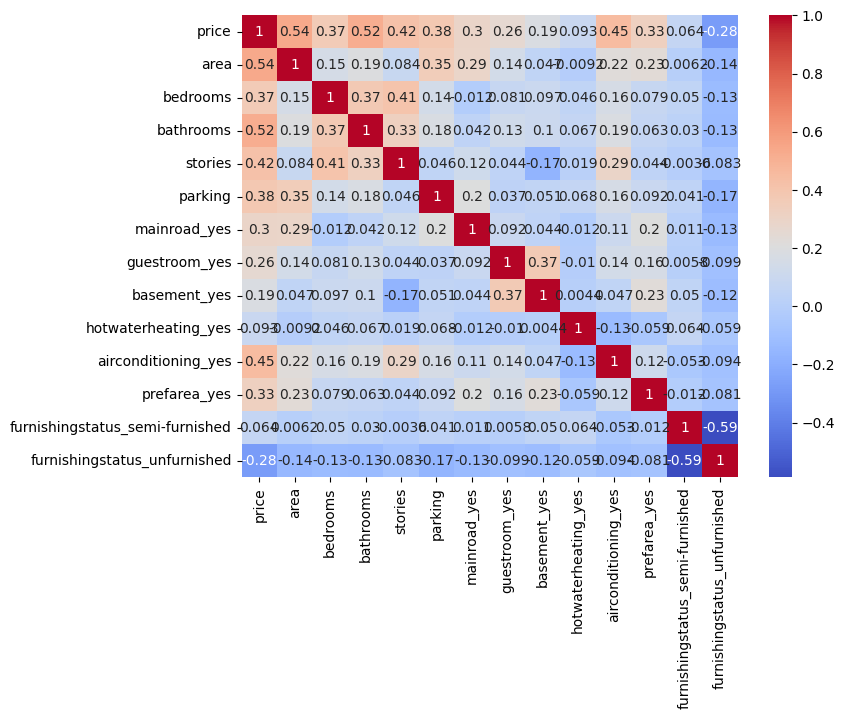

In [18]:
# Visualizing the corelation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

## Binary Encoding

In [10]:
# Binary encoding
df = pd.get_dummies(df, columns = non_numeric_columns, drop_first= True, dtype = int)
df.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
5,10850000,7500,3,3,1,2,1,0,1,0,1,1,1,0
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0
7,10150000,16200,5,3,2,0,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1


##  Data Scaling

In [11]:
# Setting features and target
X =df.drop(columns = ['price'], axis = 1)
y = df['price']

#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Model building
model = LinearRegression()

# Model Training
model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
y_predict = model.predict(X_test_scaled)
df_predict = pd.DataFrame({'Actual_Value': y_test , 'Predicted_Value': y_predict})

df_predict.head(10)

,Actual_Value,Predicted_Value
316,4060000,5.164654e+06
77,6650000,7.224722e+06
360,3710000,3.109863e+06
90,6440000,4.612075e+06
493,2800000,3.294646e+06
209,4900000,3.532275e+06
176,5250000,5.611775e+06
249,4543000,6.368146e+06
516,2450000,2.722857e+06
426,3353000,2.629406e+06


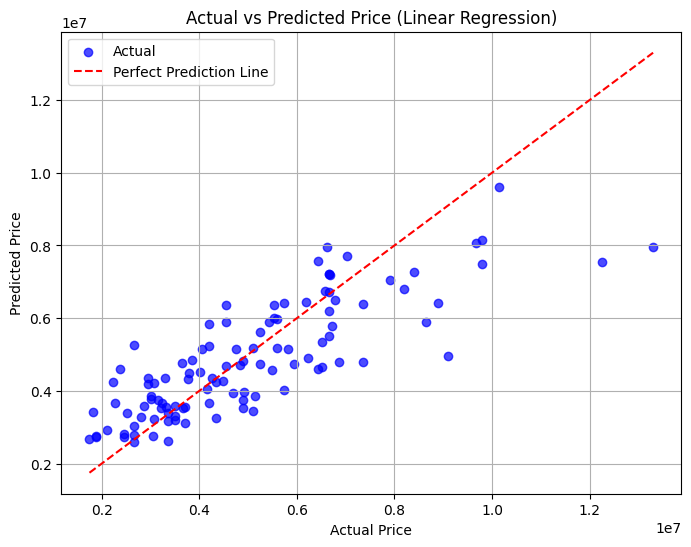

In [15]:
#Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, alpha=0.7, color='blue' , label='Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' ,label='Perfect Prediction Line')  # ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Coefficient and  Intercept

intercept = model.intercept_
print(f' The intercept is : {intercept :.2f}')
coef = model.coef_
df_coef = pd.DataFrame({'Feature' : X.columns , 'Coefficient' : coef})
print('The coefficient are: ')
df_coef

 The intercept is : 4706527.39
The coefficient are: 


,Feature,Coefficient
0,area,519552.416340
1,bedrooms,57349.559419
2,bathrooms,521879.027748
3,stories,349251.438906
4,parking,192005.953667
5,mainroad_yes,128498.628215
6,guestroom_yes,88768.667686
7,basement_yes,187067.803214
8,hotwaterheating_yes,149862.702991
9,airconditioning_yes,365157.393851


In [16]:
#Model Accuracy / Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

# Display results
print(" Model Evaluation Metrics (Linear Regression)")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"MSE  (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score (Accuracy): {r2:.2f}")


 Model Evaluation Metrics (Linear Regression)
MAE  (Mean Absolute Error): 970043.40
MSE  (Mean Squared Error): 1754318687330.67
RMSE (Root Mean Squared Error): 1324506.96
R² Score (Accuracy): 0.65
